# Worksheet 21

Name:  Haokun Wu
UID: U18377013


### Topics

- Linear Model Evaluation

## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence the need for an adjusted R^2 that penalizes for insignificant explanatory variables.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.9950618510418812
0.9951140491676965
0.9951815099145342
0.9951868967233245
0.9952791114989448
0.9952799708155071
0.9953096622399971
0.995313566564058
0.9953346870711586
0.9953414146042979
0.9953609969153266
0.9953672607318406
0.995382069750126
0.9953953178713201


a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.31249999999999983
[1, 1, 0, 0, 1]
0.31249999999999983


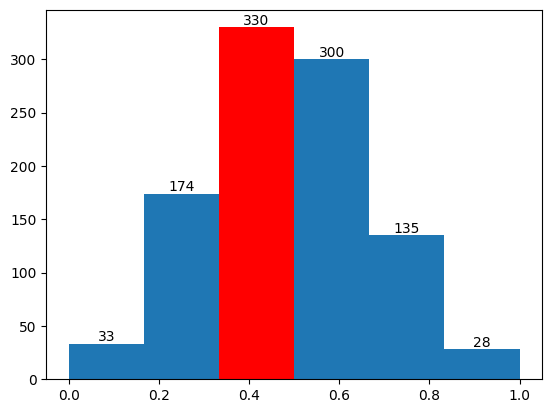

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

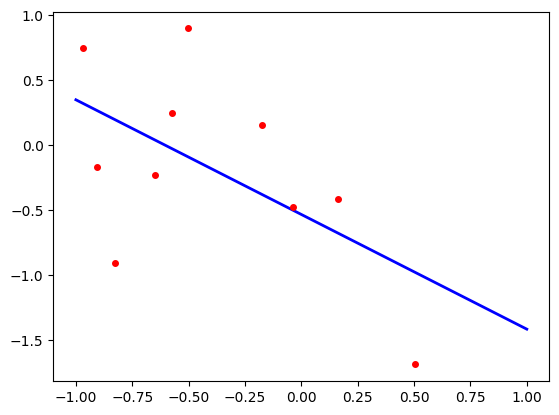

In [3]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

# Generating random data with no relationship between x and y
xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)  # Uniformly distributed between -1 and 1
y = np.random.randn(SAMPLE_SIZE)  # Normally distributed noise

# Preparing the data for linear regression
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T

# Linear regression to fit the data
beta = np.linalg.lstsq(X, y, rcond=None)[0]

# Generating the fitted line
xplot = np.linspace(-1, 1, 20)
yestplot = beta[0] + beta[1] * xplot

# Plotting
plt.plot(xplot, yestplot, 'b-', lw=2)
plt.plot(xlin, y, 'ro', markersize=4)
plt.show()


c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

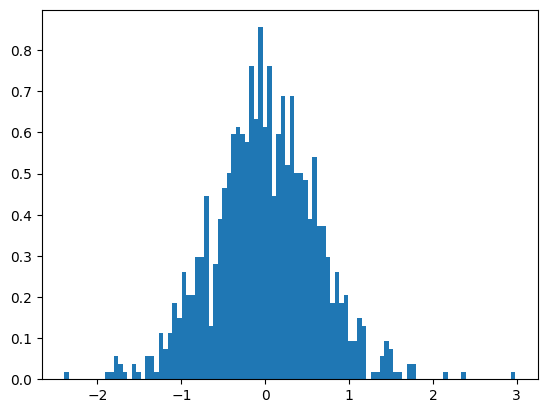

In [4]:
# Generating 1000 independent datasets and estimating the slope parameter for each

beta_hist = []

for _ in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)  # Uniformly distributed between -1 and 1
    y = np.random.randn(SAMPLE_SIZE)  # Normally distributed noise

    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = np.linalg.lstsq(X, y, rcond=None)[0][1]  # Extracting only the slope parameter
    beta_hist.append(beta)

# Plotting histogram of the slope estimates
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
plt.show()


The slope estimates are centered around zero, which aligns with the fact that there is no real relationship between X ane y. This central tendency suggests that the linear regression model correctly identifies the lack of relationship, on average.

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

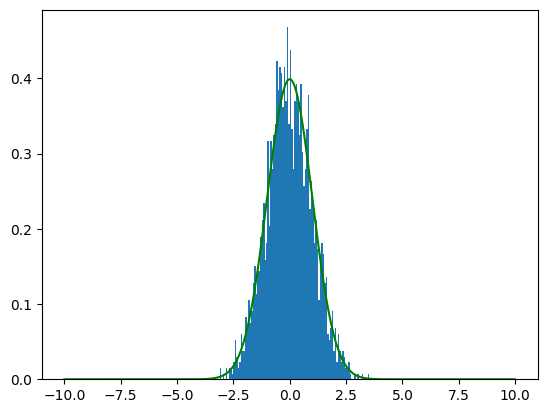

In [5]:
from scipy.stats import norm

beta_hist = []
sigma_squared = 1 

for _ in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = np.random.randn(SAMPLE_SIZE)  # Normally distributed noise with variance = sigma^2 = 1

    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = np.linalg.lstsq(X, y, rcond=None)[0]  # Extract both intercept and slope

    # Calculate S = (X^TX)^{-1}
    S = np.linalg.inv(X.T @ X)

    # Calculate z-scores for each component of beta
    z_scores = (beta - 0) / np.sqrt(sigma_squared * np.diag(S))  # Beta_k - Beta_k_true (0) / sqrt(sigma^2 * S_kk)
    beta_hist.extend(z_scores)  # Extending the list with z-scores of both intercept and slope

# Plotting histogram and standard normal pdf
xs = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.plot(xs, norm.pdf(xs), color='green')
plt.show()


e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

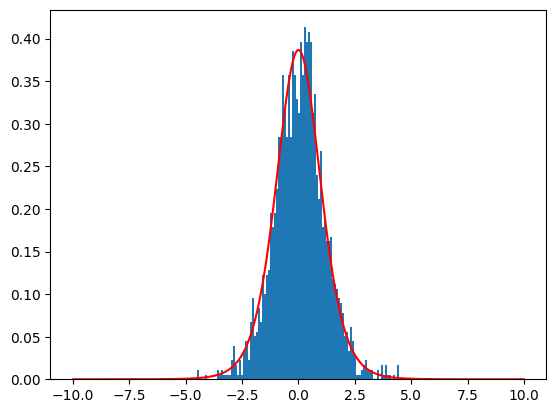

In [6]:
from scipy.stats import t

def standard_error(ytrue, ypred, p):
    rss = np.sum((ytrue - ypred) ** 2)
    n = len(ytrue)
    return np.sqrt(rss / (n - p))

beta_hist = []

for _ in range(1000):
    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = np.random.randn(SAMPLE_SIZE)  # Normally distributed noise

    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    ypred = X @ beta

    # Calculate standard error
    s = standard_error(y, ypred, 2)

    # Calculate S = (X^TX)^{-1}
    S = np.linalg.inv(X.T @ X)

    # Calculate t-scores for each component of beta
    t_scores = beta / (s * np.sqrt(np.diag(S)))  # Beta_k / (s * sqrt(S_kk))
    beta_hist.extend(t_scores)  # Extending the list with t-scores of both intercept and slope

# Plotting histogram and t-distribution pdf
xs = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.plot(xs, t.pdf(xs, SAMPLE_SIZE - 2), color='red')
plt.show()


f) You are given the following dataset:

[0.50155603 1.19902827]


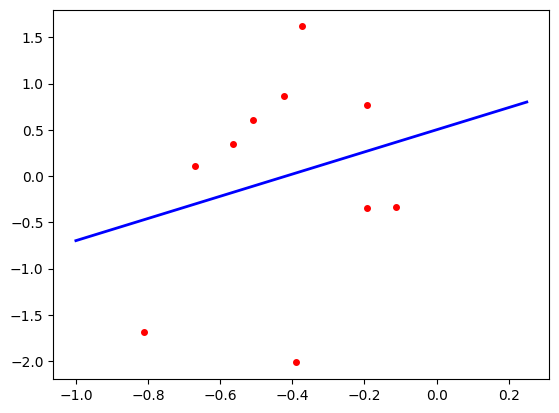

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1,.25,20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(x, y,'ro',markersize=4)
plt.show()


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [8]:
# Given dataset
x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, 
              -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 
              0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

# Preparing the design matrix X
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T

# Calculating beta_hat
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Calculating RSS and S_xx
y_pred = X @ beta_hat
rss = np.sum((y - y_pred) ** 2)
n = len(y)
p = 2  # Intercept and slope
S_xx = np.sum((x - np.mean(x)) ** 2)

# Calculating the standard error of the slope estimate
se_beta_hat = np.sqrt(rss / ((n - p) * S_xx))

# Calculating the t-statistic for the slope
t_statistic = beta_hat[1] / se_beta_hat

# Calculating the p-value
p_value = 2 * t.sf(np.abs(t_statistic), df=n - p)  # Two-tailed test
t_statistic, p_value


(0.6842586696389727, 0.5131420720905752)